In [67]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

TASK_GOALS = [
  # (  z     x,    y)
    (0.5,  0.3, 0.15),
    (0.5, -0.3, 0.15),
    (0.5,  0.3,  0.3),
    (0.5, -0.3,  0.3),
    (0.7,  0.3, 0.15),
    (0.7, -0.3, 0.15),
    (0.7,  0.3,  0.3),
    (0.7, -0.3,  0.3),
]

PATH_LEN = 200

samples = np.load("../figs/real_data/8tasks_embedded_policy_rollout_real.npy").flatten()
# samples = np.load("../figs/real_data/unseen/playback_composer_0.7_0_0.3_longer_rollout.npy").flatten()

In [68]:
samples[0].keys(), np.shape(samples[0]["obses"])

(dict_keys(['actions', 'tasks', 'obses', 'latents']), (1600, 10))

In [69]:
set(samples[0]["tasks"])

{'task0', 'task1', 'task2', 'task3', 'task4', 'task5', 'task6', 'task7'}

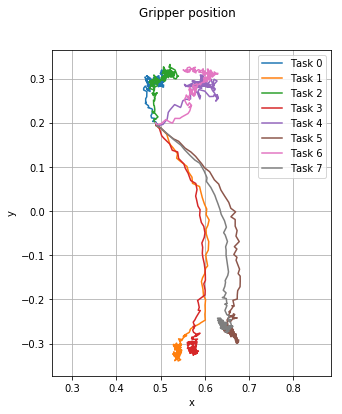

In [70]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(figsize=(5, 6))
fig.suptitle("Gripper position")
plt.grid()
plt.axis("equal")

X_AXIS = 0
Y_AXIS = 1

axes = "xyz"

gripper_pos = np.array(samples[0]["obses"])[:,-3:]
for step in range(0, len(gripper_pos), PATH_LEN):
    plt.plot(gripper_pos[step:(step+PATH_LEN), X_AXIS], gripper_pos[step:(step+PATH_LEN), Y_AXIS],
             label="Task %s" % samples[0]["tasks"][step][-1])

plt.xlabel(axes[X_AXIS])
plt.ylabel(axes[Y_AXIS])
plt.legend()
# fig.tight_layout()
# fig.savefig("real_2d_reacher_embed.pdf")

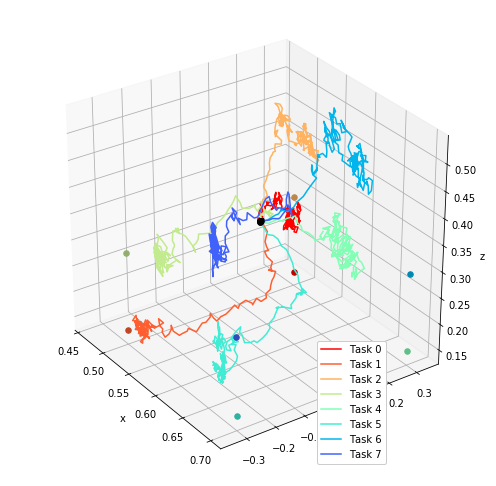

In [71]:
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(7, 7))
# fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    task = int(samples[0]["tasks"][step][-1])
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(task * 1. / 8), zorder=2,
            label="Task %i" % task, alpha=1.)
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
    true_color = np.array(colormap(task * 1. / 8)) * 0.75
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=30, color=true_color, zorder=3)

ax.view_init(elev=30, azim=-35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
legend = plt.legend(bbox_to_anchor=(.8, .3))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)
fig.tight_layout()
fig.savefig("real_gripper_pos.png", dpi=600)

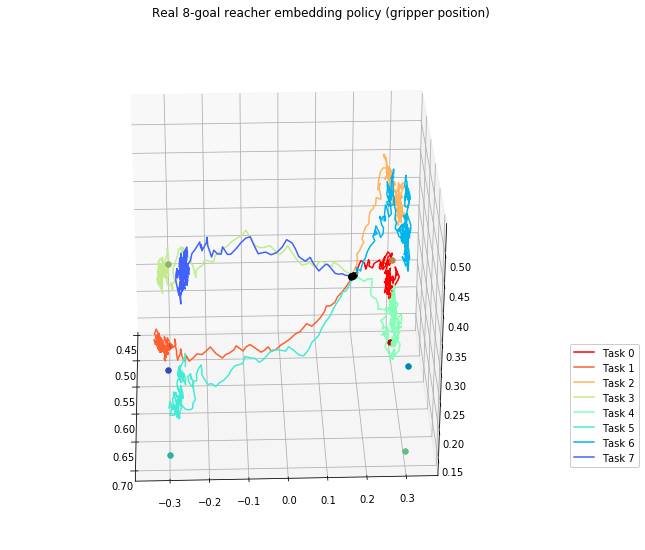

In [72]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.animation as animation


fig = plt.figure(figsize=(8 + 1, 8))
fig.suptitle("Real 8-goal reacher embedding policy (gripper position)")
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    task = int(samples[0]["tasks"][step][-1])
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, color=colormap(task * 1. / 8), zorder=2,
            label="Task %i" % task, alpha=1.)
    ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
    true_color = np.array(colormap(task * 1. / 8)) * 0.75
    true_color[3] = 1.
    ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=30, color=true_color, zorder=3)

legend = plt.legend(bbox_to_anchor=(1.2, .4))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

def update(num, *_args):
    ax.view_init(elev=30, azim=num*2)
    return _args
ani = animation.FuncAnimation(fig, update, 180,
                              interval=50, blit=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('real_gripper_pos.mp4', writer=writer)
ani

# Interpolation between tasks

In [73]:
samples = np.load("../figs/real_data/reacher_u_rollout_real.npy").flatten()
set(samples[0]["tasks"])

{'task3_4', 'task4_8', 'task8_7'}

In [75]:
(samples[0]["latents"])

[array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1931694, -1.7083886], dtype=float32),
 array([ 1.5252213, -0.1

dict_keys(['actions', 'observations'])
Start pos: [0.49019114 0.19195684 0.26488964]
End pos: [ 0.60351223 -0.07227974  0.24746001]


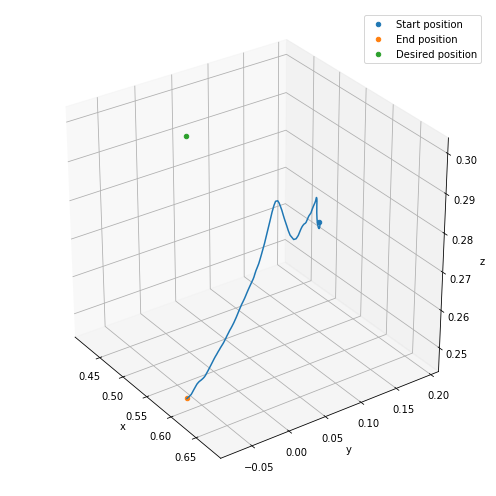

In [92]:
samples = np.load("../figs/real_data/unseen/playback_composer_0.5_0_0.3.npy").flatten()
print(samples[0].keys())

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from mpl_toolkits import mplot3d

X_AXIS = 0
Y_AXIS = 1

axes = "xyz"

gripper_pos = np.array(samples[0]["observations"])[:,-3:]
print("Start pos:", gripper_pos[0,:])
print("End pos:", gripper_pos[-1,:])

DESIRED_GOAL = [0.5, 0., 0.3]



fig = plt.figure(figsize=(7, 7))
# fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.scatter([gripper_pos[0,0]], [gripper_pos[0,1]], [gripper_pos[0,2]], label="Start position")
ax.scatter([gripper_pos[-1,0]], [gripper_pos[-1,1]], [gripper_pos[-1,2]], label="End position")
ax.scatter([DESIRED_GOAL[0]], [DESIRED_GOAL[1]], [DESIRED_GOAL[2]], label="Desired position")

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for step in range(0, len(gripper_pos), PATH_LEN):
    xs, ys, zs = gripper_pos[step:(step+PATH_LEN),0], gripper_pos[step:(step+PATH_LEN),1], gripper_pos[step:(step+PATH_LEN),2]

#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
    ax.plot(xs, ys, zs, zorder=2, alpha=1.)

ax.view_init(elev=30, azim=-35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axis("equal")
ax.legend()
fig.tight_layout()
# fig.savefig("real_gripper_pos.png", dpi=600)